# 2. Loc 1: Types of Location Problems
`ISE 754, Fall 2024`

## Loading Packages
Julia has a variety of third-party open-source packages that will be used to provide additional functionality. The first time they are used in a notebook, the command `using PackageName` loads the package.

If any package has not yet been added to Julia on your computer, the package manager in Julia should first be used to download it. (If you are already running Julia and JupyterLab on your computer, you can start another Julia instance to get a command prompt.) Type `]` at the command prompt to switch to package manager mode and then `add PackageName` (note: it can take quite a while to add load some packages). When finished, use the `Backspace` key to return to the Julia command promp

__Package Used:__ Functions from the following package are used in this notebook for the first time: 

* `CairoMakie`: [Makie Plots Reference](https://docs.makie.org/v0.21/reference/plots/scatter)

## 1. Getting Help for a Function
Every function in Julia has a docstring with information about its usage. It can be accessed using the macro `@doc`. 

In [1]:
@doc findfirst

```
findfirst(A)
```

Return the index or key of the first `true` value in `A`. Return `nothing` if no such value is found. To search for other kinds of values, pass a predicate as the first argument.

Indices or keys are of the same type as those returned by [`keys(A)`](@ref) and [`pairs(A)`](@ref).

See also: [`findall`](@ref), [`findnext`](@ref), [`findlast`](@ref), [`searchsortedfirst`](@ref).

# Examples

```jldoctest
julia> A = [false, false, true, false]
4-element Vector{Bool}:
 0
 0
 1
 0

julia> findfirst(A)
3

julia> findfirst(falses(3)) # returns nothing, but not printed in the REPL

julia> A = [false false; true false]
2×2 Matrix{Bool}:
 0  0
 1  0

julia> findfirst(A)
CartesianIndex(2, 1)
```

```
findfirst(predicate::Function, A)
```

Return the index or key of the first element of `A` for which `predicate` returns `true`. Return `nothing` if there is no such element.

Indices or keys are of the same type as those returned by [`keys(A)`](@ref) and [`pairs(A)`](@ref).

# Examples

```jldoctest
julia> A = [1, 4, 2, 2]
4-element Vector{Int64}:
 1
 4
 2
 2

julia> findfirst(iseven, A)
2

julia> findfirst(x -> x>10, A) # returns nothing, but not printed in the REPL

julia> findfirst(isequal(4), A)
2

julia> A = [1 4; 2 2]
2×2 Matrix{Int64}:
 1  4
 2  2

julia> findfirst(iseven, A)
CartesianIndex(2, 1)
```

```
findfirst(pattern::AbstractString, string::AbstractString)
findfirst(pattern::AbstractPattern, string::String)
```

Find the first occurrence of `pattern` in `string`. Equivalent to [`findnext(pattern, string, firstindex(s))`](@ref).

# Examples

```jldoctest
julia> findfirst("z", "Hello to the world") # returns nothing, but not printed in the REPL

julia> findfirst("Julia", "JuliaLang")
1:5
```

```
findfirst(ch::AbstractChar, string::AbstractString)
```

Find the first occurrence of character `ch` in `string`.

!!! compat "Julia 1.3"
    This method requires at least Julia 1.3.


# Examples

```jldoctest
julia> findfirst('a', "happy")
2

julia> findfirst('z', "happy") === nothing
true
```

```
findfirst(pattern::AbstractVector{<:Union{Int8,UInt8}},
          A::AbstractVector{<:Union{Int8,UInt8}})
```

Find the first occurrence of sequence `pattern` in vector `A`.

!!! compat "Julia 1.6"
    This method requires at least Julia 1.6.


# Examples

```jldoctest
julia> findfirst([0x52, 0x62], [0x40, 0x52, 0x62, 0x63])
2:3
```


## 2. Ex: 1-D Median Location
Traveling north, I-95 passes through or near the following cities: Jacksonville, FL; Savannah, GA; Florence, SC; Lumberton, NC; Fayetteville, NC; Rocky Mount, NC; and Richmond, VA. A company wants to build a facility along I-95 to serve customers in these cities. If the weekly demand in truckloads of customers in each city is 12, 32, 6, 15, 24, 11, and 20, respectively, determine where the facility should be located to minimize the distance traveled to serve the customers assuming that I-95 will be used for all travel.

In [2]:
cities = ["Jacksonville, FL", "Savannah, GA", "Florence, SC", "Lumberton, NC", 
          "Fayetteville, NC", "Rocky Mount, NC", "Richmond, VA"]
w = [12, 32, 6, 15, 24, 11, 20]
@show sum(w)
@show sum(w)/2
@show cumsum(w)
# Find index of city where cumulative demand first equals or exceeds half of total demand
idx = findfirst(x -> x >= sum(w)/2, cumsum(w))

sum(w) = 120
sum(w) / 2 = 60.0
cumsum(w) = [12, 44, 50, 65, 89, 100, 120]


4

In [3]:
println("The optimal location for the facility is: ", cities[idx])

The optimal location for the facility is: Lumberton, NC


## 3. Plotting
Continuing with the example from *1. Intro 2*: First, convert the vector of tuples `pt` to two vectors `x` and `y` so that the points can be plotted using `CairoMakie`.

In [4]:
pt = [(1, 1), (6, 1), (6, 5)]
@show x = [p[1] for p in pt]
@show y = [p[2] for p in pt];

x = [p[1] for p = pt] = [1, 6, 6]
y = [p[2] for p = pt] = [1, 1, 5]


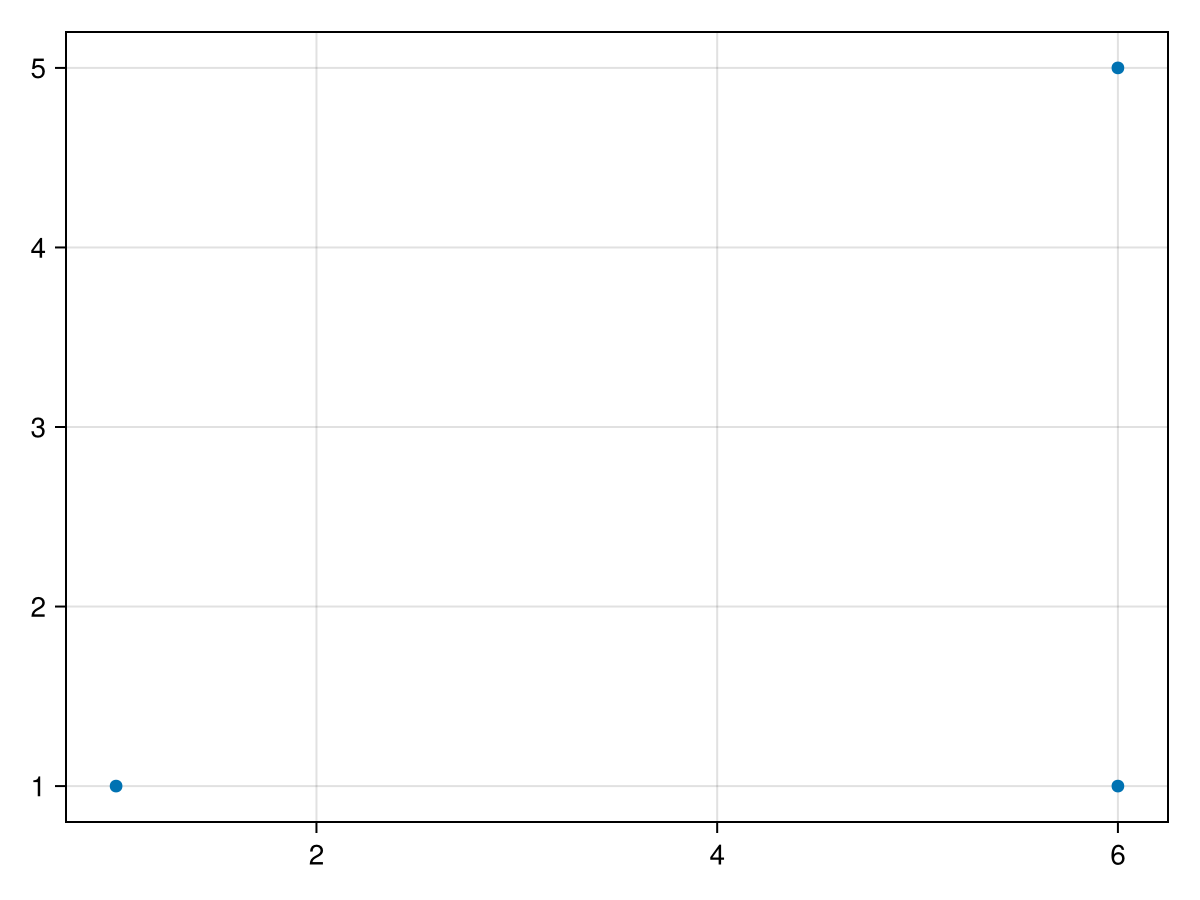

In [5]:
using CairoMakie
scatter(x, y)

In [6]:
xy = (3, 1)
scatter!(xy[1], xy[2])

Scatter{Tuple{Vector{Point{2, Float32}}}}

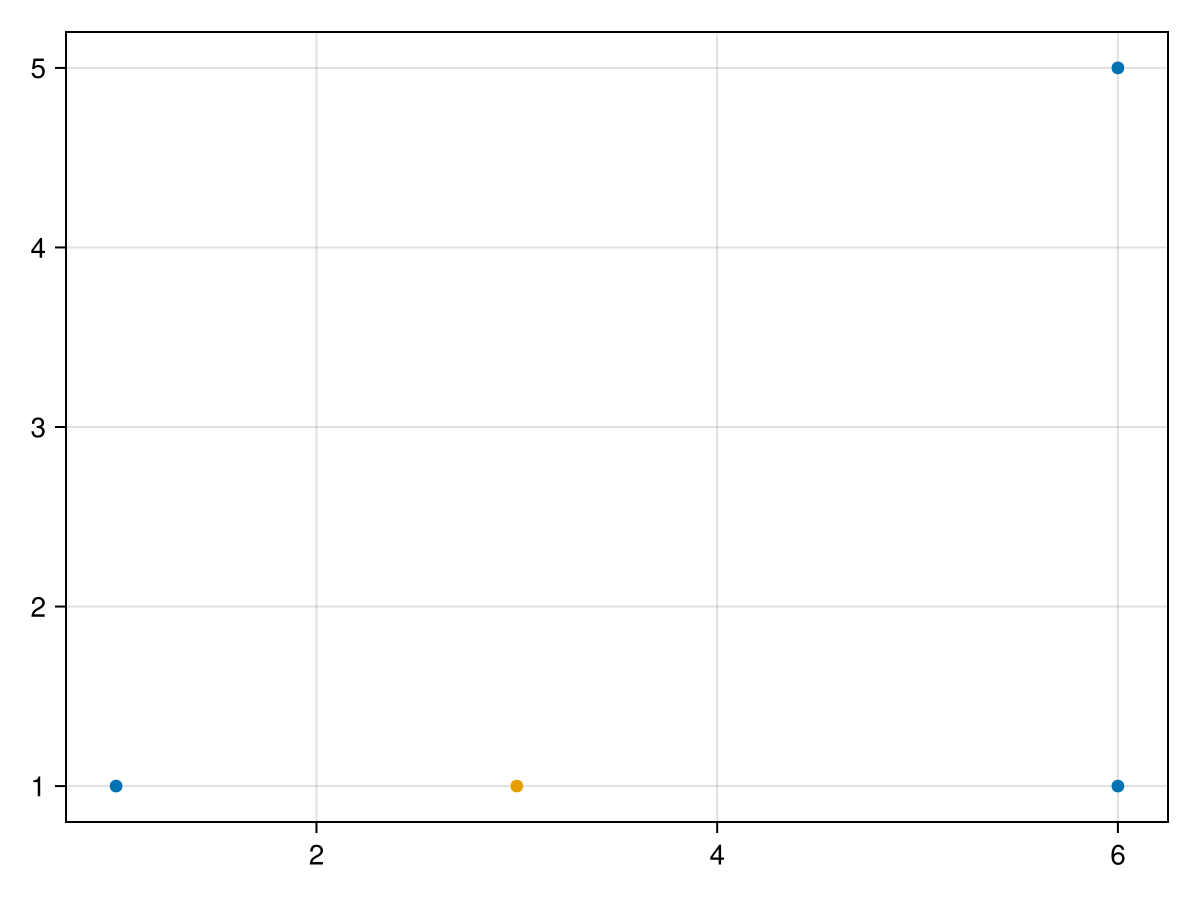

CairoMakie.Screen{IMAGE}


In [7]:
display(current_figure())

### Splatting
The point `xy` can be used directly to pass to each element `xy[1]`,`xy[2]` to the function by using `...` to *splat* `xy`. Also, `;` is added to the end of `display(current_figure())` so that `CairoMakie.Screen{IMAGE}` is not displayed afer the plot.

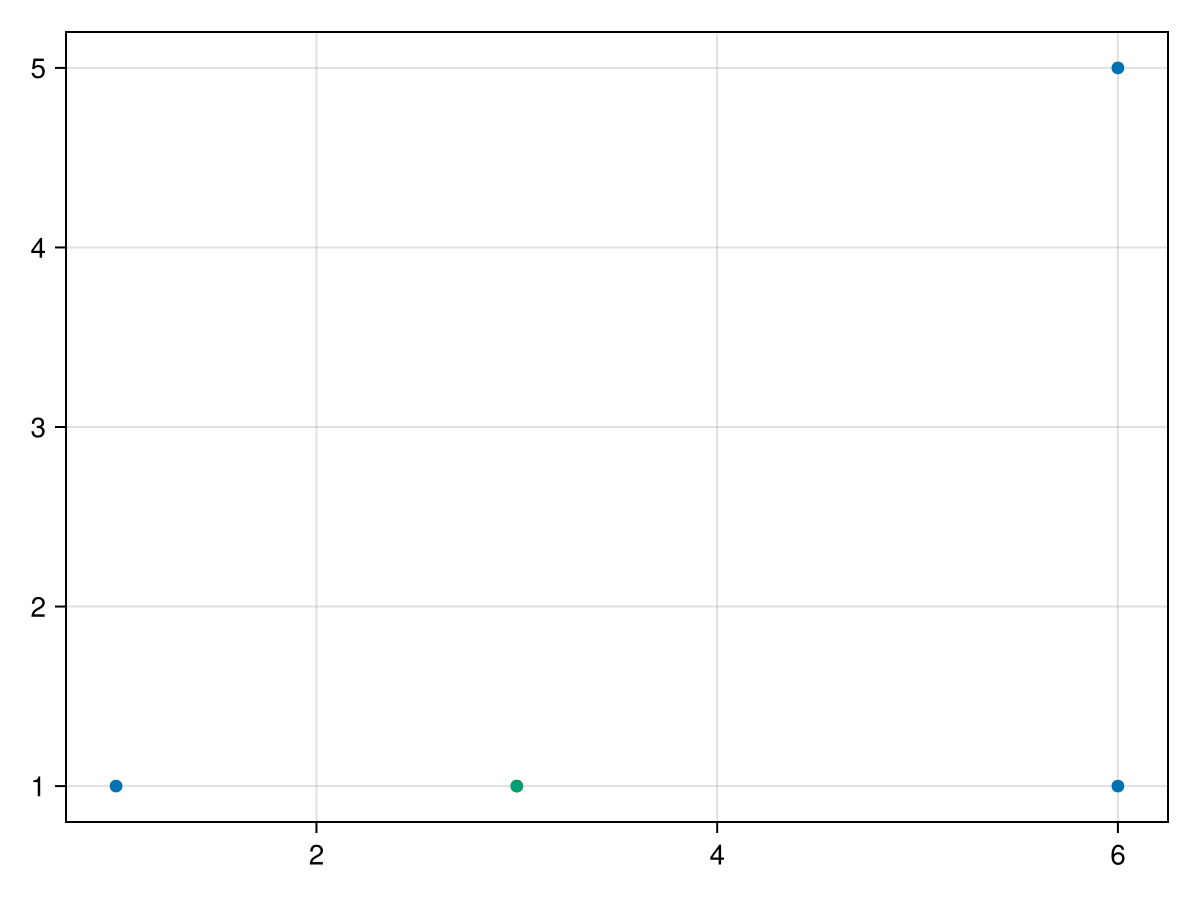

In [8]:
scatter!(xy...)
display(current_figure());

Optional keyword arguments can be used to format the plot:

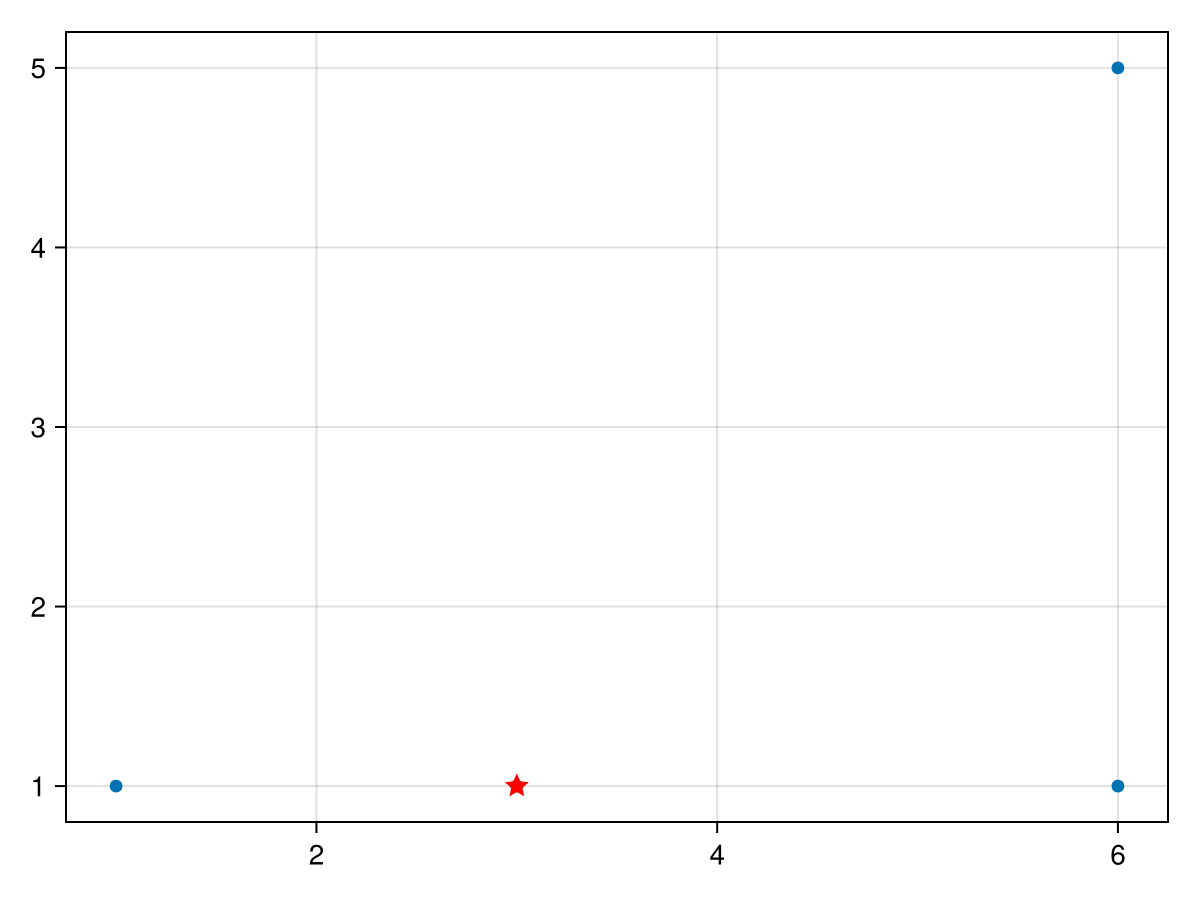

In [9]:
scatter!(xy...; color = :red, marker = :star5, markersize = 14)
display(current_figure());

### Named Tuples
Elements of a regular tuple are accessed by indexing. A named tuple allows each element to be identified by name and accessed with a dot `.`. This makes it possible for keyword arguments can be saved to a named tuple and then *splatted* into a function. 

In [10]:
kwargs = (; color = :red, marker = :star5, markersize = 14)

(color = :red, marker = :star5, markersize = 14)

In [11]:
typeof(kwargs)

@NamedTuple{color::Symbol, marker::Symbol, markersize::Int64}

In [12]:
kwargs.color

:red

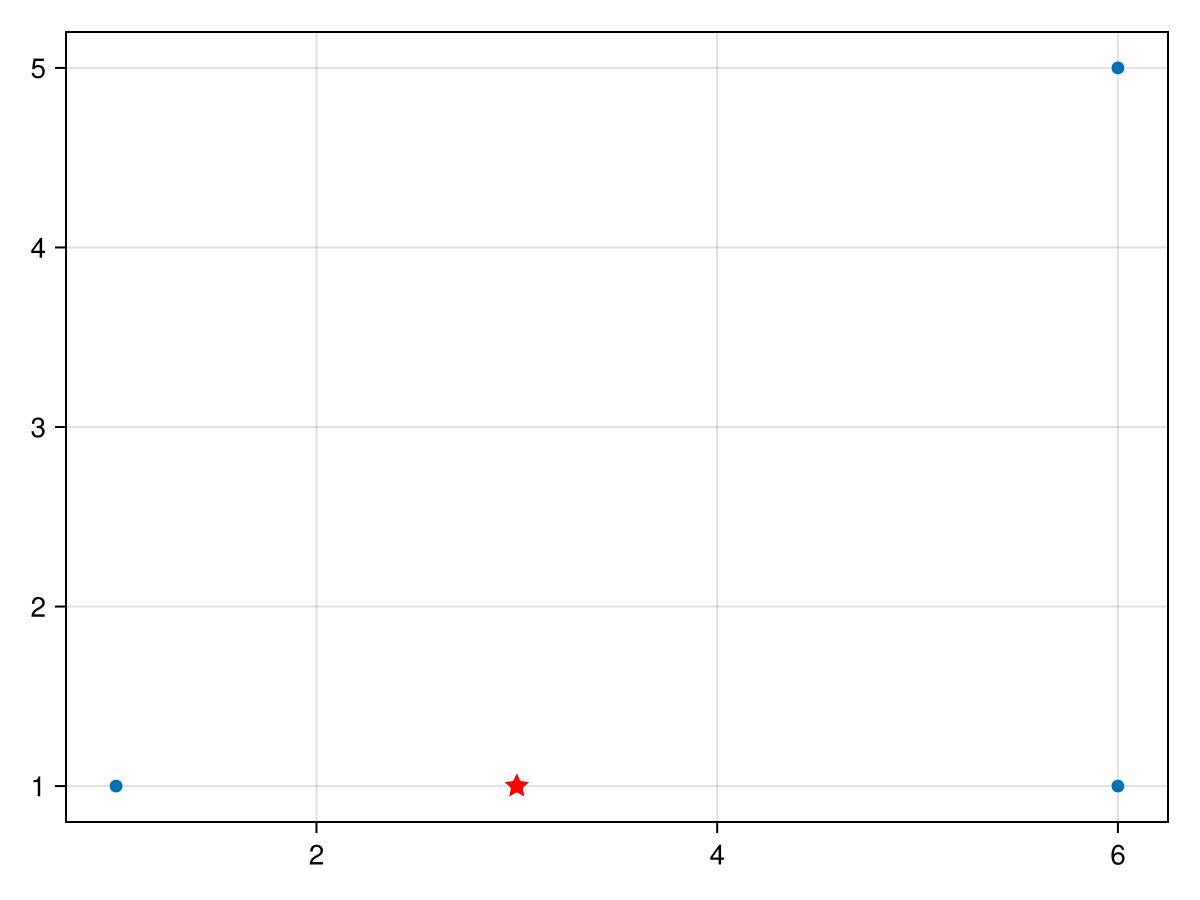

In [13]:
scatter!(xy...; kwargs...)
display(current_figure());

### ZIP and UNZIP Functions
The `zip` function combines tuples `a`, `b`, and `c` element-wise into an iterator of tuples that contains one element from each of the input tuples. Can be used to create a 2-vector of 3-vectors:

In [14]:
a = (1, 2)
b = (3, 4)
c = (5, 6)
zip(a, b, c)

zip((1, 2), (3, 4), (5, 6))

In [15]:
[[i, j, k] for (i,j,k) in zip(a, b, c)]

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

In [16]:
collect.(zip(a, b, c))

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

In [17]:
abc = [a, b, c]   # Similar to `pt`

3-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (3, 4)
 (5, 6)

In [18]:
collect.(zip(abc...))

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

Create a one-liner for this, and also for displaying the current figure, then plot `pt` and `xy`:

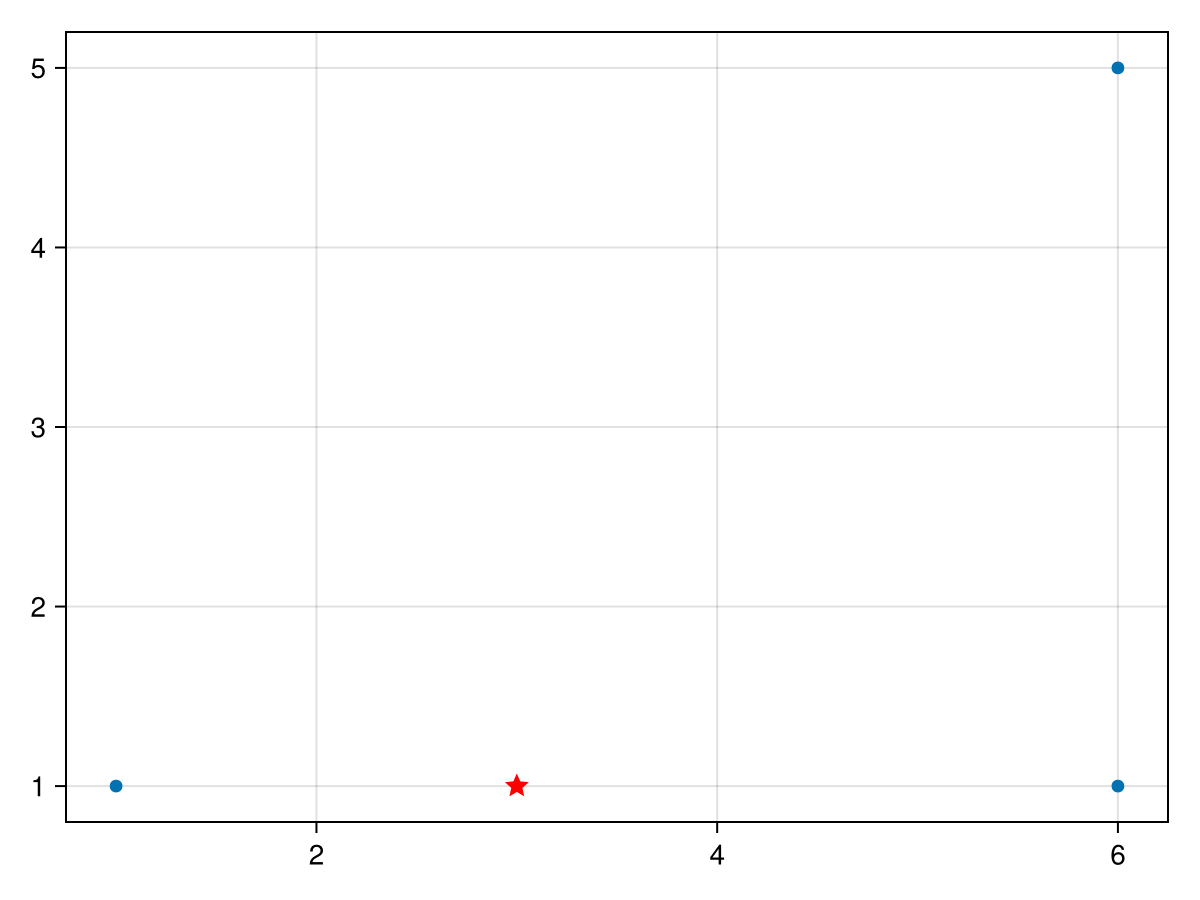

In [19]:
unzip(x) = collect.(zip(x...))
dcf() = display(current_figure())

scatter(unzip(pt)...)
scatter!(xy...; kwargs...)
dcf();